In [52]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
poll_data = pd.read_csv('./data/mlcourse_open_first_survey_parsed.csv')

In [25]:
poll_data.head(2)

,id,Timestamp,Представьтесь в 2-3 фразах,Работали ли Вы с Jupyter notebooks?,Что Вы ждете от курса?,Потом мы прямо этот же набор данных поанализируем с Pandas. Так что какой Ваш любимый вид спорта?,"Ладно, посерьезней: согласны ли Вы на обработку персональных данных?","Какие оцениваете свой уровень математической подготовки? (матан, линал, теорвер)","Чему равна дисперсия равномерного на [0,6] распределения?","Найдите минимум функции 3x^4-8x^3+6x^2-12 на отрезке [-3,3]",Сколько параметров у нормального распределения?,Сможете написать на Python генератор чисел Фибоначчи?,"Хорошо, а готовы к началу курса (6 сентября 2017) освоить азы Python? На уровне Code Academy, DataCamp или github.com/Yorko/python_intro",Оцените свой уровень владения GitHub,"Посоветуйте хороший фильм в стиле ""Игра в имитацию"" :)"
0,0,2016/12/05 10:39:59 am GMT+3,крутой Developer,Да,"Ребята, вижу ваш настрой, уверен курс будет ин...",Starcraft,Да,4,3,-12,2.0,Да,Да,Проф,"Прочитай книгу Лема ""Голос Неба"", очень много ..."
1,1,2016/12/05 10:44:27 am GMT+3,Разработчик Navision. Изучаю тему DS для возмо...,Да,"Практики, подкрепленной теорией. Хочется упоря...",NaN,Да,1,3,NaN,2.0,"Да, но фиговый.",Да,Могу скачать материалы,NaN


In [26]:
# Сразу видно одно неудобство - очень длинные названия признаков, которые будут использоваться как:
# poll_data['Посоветуйте хороший фильм в стиле "Игра в имитацию" :)']

In [28]:
dict(zip(poll_data.columns, ['id', 'time', 'intro', 'jupyter', 'expect',
                      'sport', 'personal', 'math_level', 'quest1',
                      'quest2', 'quest3', 'fib_gen', 'python',
                      'github', 'movie']))

{'id': 'id',
 'Timestamp': 'time',
 'Представьтесь в 2-3 фразах': 'intro',
 'Работали ли Вы с Jupyter notebooks?': 'jupyter',
 'Что Вы ждете от курса?': 'expect',
 'Потом мы прямо этот же набор данных поанализируем с Pandas. Так что какой Ваш любимый вид спорта?': 'sport',
 'Ладно, посерьезней: согласны ли Вы на обработку персональных данных?': 'personal',
 'Какие оцениваете свой уровень математической подготовки? (матан, линал, теорвер)': 'math_level',
 'Чему равна дисперсия равномерного на [0,6] распределения?': 'quest1',
 'Найдите минимум функции 3x^4-8x^3+6x^2-12 на отрезке [-3,3]': 'quest2',
 'Сколько параметров у нормального распределения?': 'quest3',
 'Сможете написать на Python генератор чисел Фибоначчи?': 'fib_gen',
 'Хорошо, а готовы к началу курса (6 сентября 2017) освоить азы Python? На уровне Code Academy, DataCamp или github.com/Yorko/python_intro': 'python',
 'Оцените свой уровень владения GitHub': 'github',
 'Посоветуйте хороший фильм в стиле "Игра в имитацию" :)': 'mov

In [33]:
rename_dic = dict(zip(poll_data.columns,
                     ['id', 'time', 'intro', 'jupyter', 'expect',
                      'sport', 'personal', 'math_level', 'quest1',
                      'quest2', 'quest3', 'fib_gen', 'python',
                      'github', 'movie']))

In [34]:
poll_data.rename(columns=rename_dic, inplace=True) # переименовываем с помощью метода rename

In [35]:
poll_data.head(2)

,id,time,intro,jupyter,expect,sport,personal,math_level,quest1,quest2,quest3,fib_gen,python,github,movie
0,0,2016/12/05 10:39:59 am GMT+3,крутой Developer,Да,"Ребята, вижу ваш настрой, уверен курс будет ин...",Starcraft,Да,4,3,-12,2.0,Да,Да,Проф,"Прочитай книгу Лема ""Голос Неба"", очень много ..."
1,1,2016/12/05 10:44:27 am GMT+3,Разработчик Navision. Изучаю тему DS для возмо...,Да,"Практики, подкрепленной теорией. Хочется упоря...",NaN,Да,1,3,NaN,2.0,"Да, но фиговый.",Да,Могу скачать материалы,NaN


In [41]:
poll_data['jupyter'].value_counts().head(10) # видим что данные разнородные

Да                                                              2071
Нет                                                              766
немного                                                            7
Немного                                                            3
Spyder IDE                                                         2
Да, но мало                                                        2
Немного,  недавно начал проходить курс от яндекса на курсоре       2
не много                                                           1
Работал в Spyder                                                   1
А удаленное обучение возможно?                                     1
Name: jupyter, dtype: int64

In [44]:
# Отфильтруем эти ответы на 'Да', 'Нет' и 'Остальное'
poll_data['jupyter'].map({'Да': 1, 'Нет': 0}).head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: jupyter, dtype: float64

In [45]:
poll_data['jupyter'].map({'Да': 1, 'Нет': 0}).unique() # unique - показывает все уникальные значения

array([ 1., nan,  0.])

In [48]:
poll_data['jupyter'].map({'Да': 1, 'Нет': 0}).value_counts() # nan не посчитались

1.0    2071
0.0     766
Name: jupyter, dtype: int64

In [50]:
poll_data['jupyter'].map({'Да': 1, 'Нет': 0}).fillna(2).value_counts() # fillna - меняет дефолтное значение на аргумент(2)

1.0    2071
0.0     766
2.0     107
Name: jupyter, dtype: int64

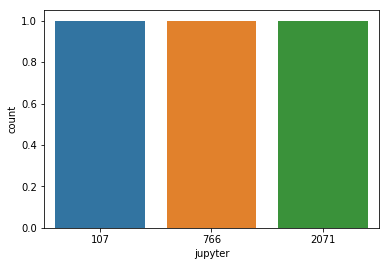

In [54]:
jupyter_levels = poll_data['jupyter'].map({'Да': 1, 'Нет': 0}).fillna(2).value_counts()
sns.countplot(jupyter_levels);

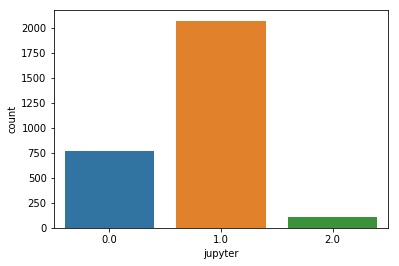

In [56]:
# Неправильно построен график - увидели что в объекте 3 значения и каждый встречается по одному разу.
# Необходимо убрать value_counts - тогда будет столбец значений и его можем нарисовать.
jupyter_levels = poll_data['jupyter'].map({'Да': 1, 'Нет': 0}).fillna(2)
sns.countplot(jupyter_levels);

In [57]:
# В столбце 'представьтесь' посчитаем топ-10 популярных слов:
poll_data['intro'].head()

0                                     крутой Developer
1    Разработчик Navision. Изучаю тему DS для возмо...
2    Я Software Engeneer разработчик, активно интер...
3    Семилетний инженер. Специализируюсь в компьюте...
4                           программист. pl/sql python
Name: intro, dtype: object

In [59]:
# Попытаемся все строчки объединить и создать один большой 'мешок слов'.
poll_data['intro'].apply(lambda s: s.strip().split()).tail() # представим каждую строку как список слов:

2939        [Занимаюсь, анализом, данных, в, страховании]
2940                    [Аналитик, в, телеком, компании.]
2941    [Занимаюсь, сопровождением, автоматизированных...
2942                           [разработчик, Python,, JS]
2943    [Работал, аналитиком, в, разных, сферах,, вклю...
Name: intro, dtype: object

In [60]:
# используем метод concatenate из numpy:
b = np.array([['a', 'b'], ['c', 'd']])
np.concatenate(b)

array(['a', 'b', 'c', 'd'], dtype='<U1')

In [61]:
poll_data['intro'].apply(lambda s: s.strip().split()).values

array([list(['крутой', 'Developer']),
       list(['Разработчик', 'Navision.', 'Изучаю', 'тему', 'DS', 'для', 'возможной', 'переквалификации.']),
       list(['Я', 'Software', 'Engeneer', 'разработчик,', 'активно', 'интересующийся', 'областью', 'машинного', 'обучения.', 'Имею', 'реальный', 'опыт', 'в', 'DL', '(неcколько', 'задача', 'связанных', 'с', 'разпознавание', 'объектов', 'и', 'классификацией', 'изображений).']),
       ...,
       list(['Занимаюсь', 'сопровождением', 'автоматизированных', 'систем,', 'в', 'т.ч.', 'тех,', 'в', 'которых', 'очень', 'много', 'данных', 'в', 'БД', 'хранится.', 'Люблю', '"покопаться"', 'в', 'данных.', 'Изучаю', 'питон', 'с', '2017', 'года']),
       list(['разработчик', 'Python,', 'JS']),
       list(['Работал', 'аналитиком', 'в', 'разных', 'сферах,', 'включая', 'e-commerce,', 'телеком', 'и', 'онлайн-банкинг.', 'Увлекаюсь', 'программированием'])],
      dtype=object)

In [66]:
all_unique_words = set(np.concatenate(poll_data['intro'].apply(lambda s: s.strip().split()).values))

In [67]:
# DataFrame в Pandas опираются на numpy, numpy опирается на c++

In [68]:
len(all_unique_words)

8294

In [69]:
all_words = np.concatenate(poll_data['intro'].apply(lambda s: s.strip().split()).values)

In [70]:
len(all_words)

26533

In [71]:
# Метод 'в лоб': множество превратить в список - а потом еще в Series
pd.Series(list(all_words)).value_counts()

в                        1235
и                         734
на                        409
по                        283
Студент                   279
с                         219
Работаю                   201
курса                     187
данных                    178
Data                      173
Я                         166
работаю                   157
data                      130
машинным                  123
хочу                      122
ML                        122
-                         114
занимаюсь                 103
интересуюсь               101
не                        100
Хочу                       98
студент                    93
но                         88
анализом                   88
Интересуюсь                88
для                        87
я                          86
Люблю                      80
В                          80
ВШЭ                        76
                         ... 
авиакомпании                1
перевернуть                 1
теплофизик

In [72]:
# Видно что первые места занимают 'стоп-слова' - предлоги. Избавимся от них.

In [75]:
from nltk.corpus import stopwords

In [76]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NotePad\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [77]:
len(stopwords.words('russian'))

151

In [79]:
# Определим входит ли значение в стоп-слова:
pd.Series(list(all_words)).isin(stopwords.words('russian')).head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
8    False
9    False
dtype: bool

In [82]:
words_series = pd.Series(list(all_words))
words_series[~words_series.isin(stopwords.words('russian'))].value_counts().head(10)

Студент     279
Работаю     201
курса       187
данных      178
Data        173
Я           166
работаю     157
data        130
машинным    123
ML          122
dtype: int64